In [1]:
import cellxgene_census as czi
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import os
from IPython.display import display # easy viewing of dataframes

In [2]:
print(czi.__version__)

1.15.0


## Creating a census object
Testing out if:
1. the Census object is generated
2. checking the data sources

In [3]:
census = czi.open_soma()

The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.


ValueError: Unsupported SOMA object encoding version 1.1.0

In [4]:
import cellxgene_census
import tiledbsoma
import sys

print("cellxgene-census version:", cellxgene_census.__version__)
print("cellxgene_census location:", cellxgene_census.__file__)
print("tiledbsoma version:", tiledbsoma.__version__)
print("tiledbsoma location:", tiledbsoma.__file__)
print("Python executable:", sys.executable)

cellxgene-census version: 1.15.0
cellxgene_census location: /home/s5srinivasan/py39env/lib64/python3.9/site-packages/cellxgene_census/__init__.py
tiledbsoma version: 1.11.4
tiledbsoma location: /home/s5srinivasan/py39env/lib64/python3.9/site-packages/tiledbsoma/__init__.py
Python executable: /home/s5srinivasan/py39env/bin/python3


In [ ]:
census

## Sample query and testing 

The function to get h5ad files is ```get_anndata()```. Note that this obtains only raw counts by default, and when the h5ad is printed out, it provides no indication of other layers (such as normalised counts) being present.

Include normalized and raw counts like so:
```X_layers=['raw','normalized'],```

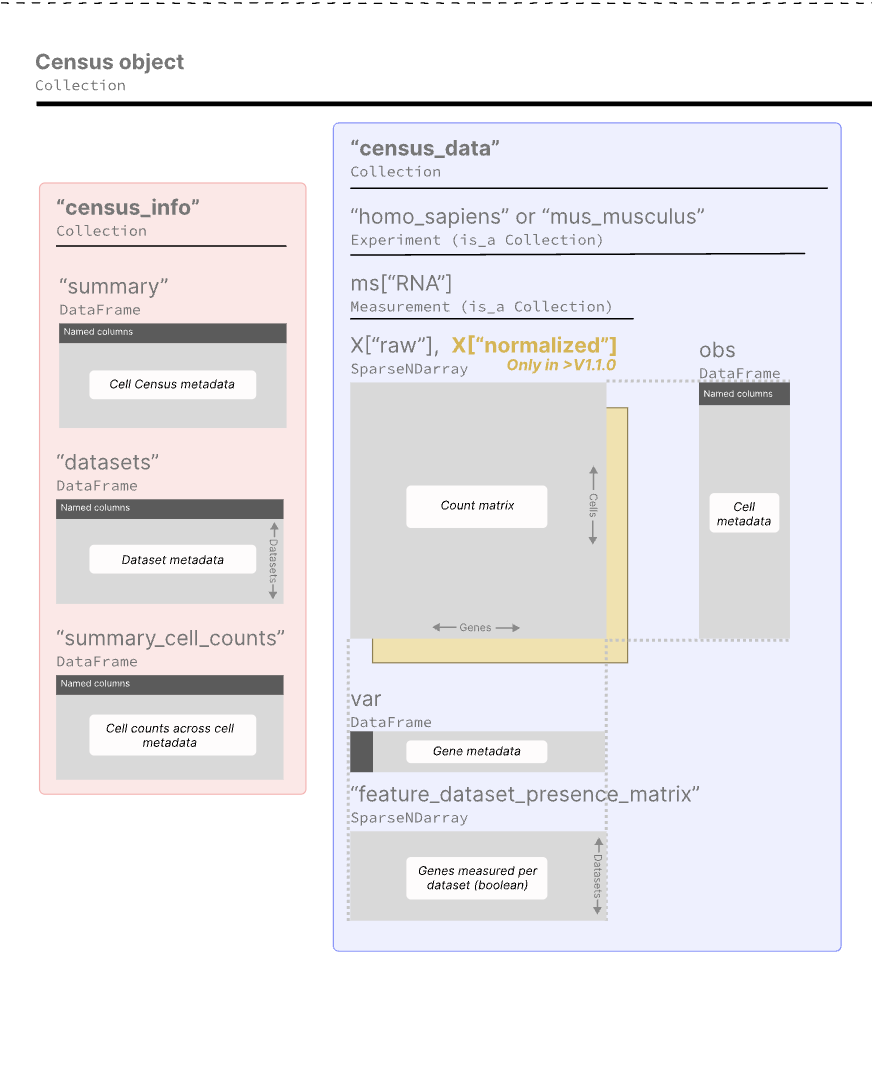

In [ ]:
!pip list

In [ ]:
test_data = czi.get_anndata(
    census=census,
    organism="Homo sapiens",
    X_layers=['normalized'],
    var_value_filter="feature_id in ['ENSG00000161798']",
    obs_value_filter="tissue_general == 'blood' and disease == 'COVID-19'",
)

In [ ]:
test_data.obs.head(1).T # transpose the df for easy viewing

In [ ]:
test_data.var.head(1).T # transpose the df for easy viewing

In [ ]:
normalized = test_data.layers['normalized'] # this is the normalized counts layer. This is not downloaded by default
raw = test_data.X # .X is the raw count layer, not the normalized counts, as is the case with most adata files.

In [ ]:
df = pd.DataFrame(adata.X.toarray())
print(df)

# Obtaining COVID-19 PBMC Data
1. The dataset is ~5M cells large. ```get_anndata()``` cannot query all directly into RAM, causing an overload.
2. We can instead chunk the query and obtain ```.h5ad``` files

In [ ]:
OUTPUT_DIR = "../data/cellxgene_downloads"
QUERY_NAME = "covid19_pbmc"
VERSION = "latest"  # Can be set to a specific version if needed
BATCH_SIZE = 50000  # Adjust based on available memory

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [ ]:
with cellxgene_census.open_soma(census_version="latest") as census:
    # Get metadata for all human samples (without filtering)
    metadata_df = cellxgene_census.get_var(
        census=census,
        organism="Homo sapiens"
    )

    # Print all available obs column names
    print(metadata_df.columns.tolist())  # List of all available obs_column_names

In [ ]:
with cellxgene_census.open_soma(census_version=VERSION) as census:
        # First, get all matching obs indices
        all_obs_df = cellxgene_census.get_obs(
            census=census,
            organism="Homo sapiens",
            value_filter="tissue == 'blood' and disease == 'influenza'"

        )

In [ ]:
all_obs_df